In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# First Order ODEs

Air friction while falling

$$ \frac{dv}{dt} - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$

The first thing we need to do is write it in the form

$$\frac{dv}{dt} = f(t,v)$$

In other words, "derivative of v equals something that depends v and time". This is easy in this example:

$$\frac{dv}{dt} = \alpha v^2 - \beta$$

and note that there is no dependence on time in this particular example. We need to write this differential equation in **python form**

In [2]:
def dvdt(t, v):
    return 3*v**2 - 5
v0 = 0

Solve differential equation. There are two main solvers in scipy

* `odeint`: Pretty classic, uses a particular solve called lsoda from the FORTRAN library odepack
* `solve_ivp`: More customizable, can choose from a list of possible solvers

In [3]:
t = np.linspace(0, 1, 100)

In [4]:
sol_m1 = odeint(dvdt, y0=v0, t=t, tfirst=True) 
#If you don't have the tfirst argument, it thinks the v should come first

sol_m2 = solve_ivp(dvdt, t_span=(0,max(t)), y0=[v0], t_eval=t)
#The array for y0 is for when you solve coupled ODEs

Look at the solution. It will become obvious why it is returned in this form once we deal with systems of ODEs (what these solvers are really meant for)

In [5]:
v_sol_m1 = sol_m1.T[0]
v_sol_m2 = sol_m2.y[0]

#Again, it is a bunch of arrays because this is designed for coupled ODEs
#Consider printing out just sol_m1 and sol_m2 to see the data structures 

Plot

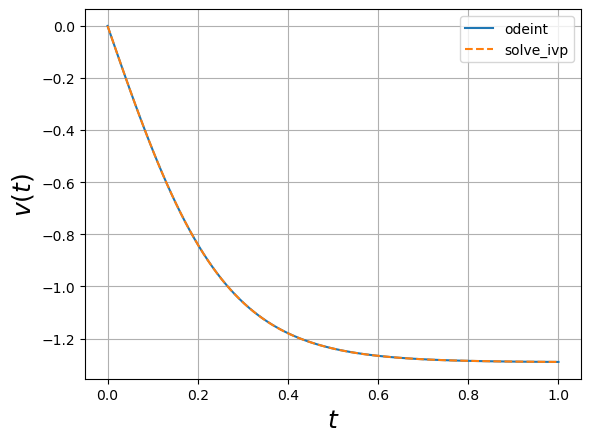

In [6]:
plt.plot(t, v_sol_m1, label = 'odeint')
plt.plot(t, v_sol_m2, linestyle = '--', label = 'solve_ivp')
plt.ylabel('$v(t)$', fontsize=18)
plt.xlabel('$t$', fontsize=18)
plt.legend()
plt.grid()
plt.show()

# Coupled first order ODEs

### This would be most similar to what might be seen in Astrochemical Modeling, though we are just using random coupled ODEs in the first example.

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$
$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$

Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dx} = \vec{f}(x, \vec{S}) = \vec{f}(x, y_1, y_2) =  \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}  = \begin{bmatrix}  y_1 + y_2^2 + 3x\\ 3y_1 + y_2^3 - \cos(x) \end{bmatrix}$$

S is a vector that has everything that we would like to solve

In [7]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2  + 3*x, #y1 prime
           3*y1 + y2**3 - np.cos(x)] #y2 prime
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0) #a vector

Solve this ODE

In [8]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=x, tfirst=True)

Get $y_1$ and $y_2$ from the solution

In [9]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

#Consider printing out just the sol

And plot

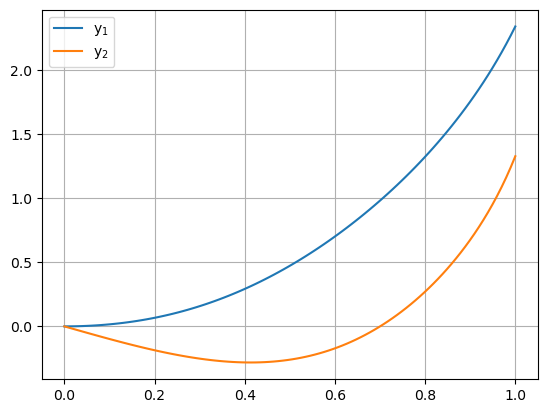

In [12]:
plt.plot(x, y1_sol, label = r'y$_1$')
plt.plot(x, y2_sol, label = r'y$_2$')
plt.legend()
plt.grid()

# Another example of coupled first order ODEs

Chemical reactions, especially in astronomy are almost always in environments where many molecules, atoms, and ions are existing in the same space and reacting with each other. Different environmental conditions such as temperature, density, the presence of dust, the UV radiation flux, shielding, and what specific particles are present can significantly impact the reaction rates in a way that cannot be controlled as easily as it can be on Earth.

One example of this is in prestellar cores. We may start out with a whole bunch of $CO$ interacting with the $H_3^+$ to make $HCO^+$, which does not let us form much of anything else because there is so much $CO$. But at cold enough temperatures at below 20$K$, the CO will begin to freeze out onto dust grains. This allows us to make more interesting molecules in both the gas phase and then by using the ice phase $CO$ through successive hydrogenation to make some more complex molecules.

Let's model the rate at which $CO$ freezes out onto dust grains as 
$$ \frac{d[CO]}{dt} = -[CO]^2 - 4[N_2H^+] - [D] + e^t \hspace{10mm} [CO](0)=0  $$

The rate at which $N_2$ reacts the the now available $H_3^+$ is coupled with the $CO$ freeze out rate like this
$$ \frac{d[N_2H^+]}{dt} = 3[CO] - [N_2H^+]^2 + 3[D] + 4\sin(t) \hspace{10mm} [N_2H^+](0)=0  $$

And then the rate at which hydrogen atoms can successively bond with the ice phase $CO$ can be modeled like this
$$ \frac{d[D]}{dt} = [CO]^2 - 3[D] + 4\cos(t) \hspace{10mm} [D](0)=0  $$

In [10]:
def dSdt(t, S):
    CO, N2H, D = S
    return [-CO*2 - 4*N2H - D**2 + np.exp(t), #d[CO]/dt
           3*CO - N2H**2  + 3*D + 4*np.sin(4*t), #d[N2H+]/dt
           CO*2 - 3*D + 4*np.cos(t)] #d[D]/dt
CO_0 = 0
N2H_0 = 0
D_0 = 0
S_0 = (CO_0, N2H_0, D_0) #a vector

In [11]:
t = np.linspace(0, 1, 1000)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

CO_sol = sol.T[0]
N2H_sol = sol.T[1]
D_sol = sol.T[2]

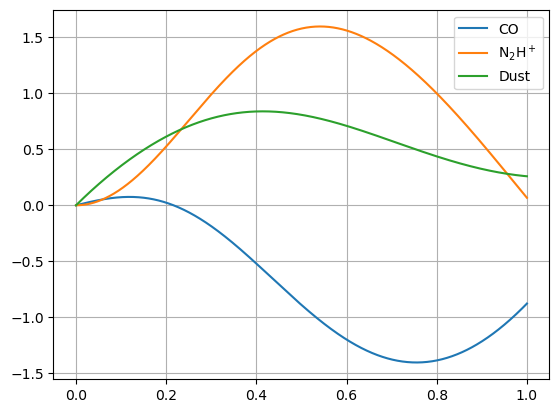

In [12]:
plt.plot(t, CO_sol, label = r'CO')
plt.plot(t, N2H_sol, label = r'N$_2$H$^+$')
plt.plot(t, D_sol, label = r'Dust')
plt.legend()
plt.grid()

# Second Order ODEs

**Python does not have functions to directly solve second order ODEs**. 
* But **any second order ODE can be converted into two first order ODEs**.

Consider 

$$\ddot{x} = -\dot{x}^2 + \sin(x)$$

We can convert this into two first order ODEs as follows:

* Take $x$ (this is what we're trying to solve for). Then define $\dot{x}=v$ so that $v$ becomes a new variable.
* Note that $\dot{x}=v$ is one differential equation
* Since $\dot{v} = \ddot{x} = -\dot{x}^2 + \sin(x) = -v^2 + \sin(x)$ we get another differential equation

Our two equations:

$$\dot{x} = v$$
$$\dot{v} = -v^2 + \sin(x)$$

These are two coupled first order equations. They require an initial condition ($x_0$ and $v_0$)

In [17]:
def dSdx(x, S):
    x, v = S
    return [v,
           -v**2 + np.sin(x)]
x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)

In [18]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)

In [19]:
x_sol = sol.T[0]
v_sol = sol.T[1]

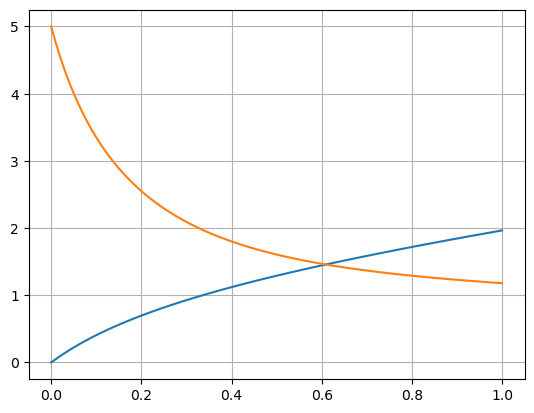

In [21]:
plt.plot(t, x_sol)
plt.plot(t, v_sol)
plt.grid()

This process can be repeated for third order (required defining two new variables) fourth order (requires defining three new variables) and so on...

**Example:** Two coupled third order equations

$$\dddot{x_2}= -\ddot{x_1}^3 + \dot{x_2} + x_1 + \sin(t)$$
$$\dddot{x_1}= -2\dot{x_2}^2 + x_2$$

Define 
* $v_1 = \dot{x_1}$
* $v_2 = \dot{x_2}$
* $a_1 = \ddot{x_1} = \dot{v_1}$
* $a_2 = \ddot{x_2} = \dot{v_2}$

These make up four differential equations. Then noting that $\dot{a_1} = \dddot{x_1}$ and $\dot{a_2} = \dddot{x_2}$ we get

* $\dot{a_2} = -a_1^3 + v_2 + x_1 + \sin(t)$
* $\dot{a_1} = -2v_2^2 + x_2$

Then

$$\vec{S} = \begin{bmatrix} x_1\\ v_1 \\ a_1 \\ x_2 \\ v_2 \\ a_2 \end{bmatrix} \hspace{10mm} \implies \hspace{10mm} \frac{d\vec{S}}{dt} = \begin{bmatrix} \dot{x_1}\\ \dot{v_1} \\ \dot{a_1} \\ \dot{x_2} \\ \dot{v_2} \\ \dot{a_2} \end{bmatrix} =  \begin{bmatrix} v_1\\ a_1 \\ -2v_2^2 + x_2 \\ v_2 \\ a_2 \\ -a_1^3 + v_2 + x_1 + \sin(t) \end{bmatrix}$$

In [22]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1,
            a1,
            -2*v2**2 + x2,
            v2,
            a2,
            -a1**3 + v2 + v1 + np.sin(t)]
x1_0 = 0
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
v_0 = 0
S_0 = (x1_0, v1_0, a1_0, x1_0, v1_0, a1_0)

In [23]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

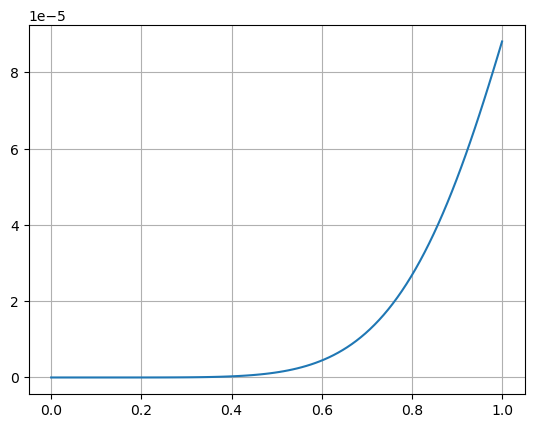

In [25]:
plt.plot(t,sol.T[0])
plt.grid()

# Be Careful!

Not all solvers work for all ODEs. For example, the ODEs for 3 body motion 

* $dx_1/dt = v_{x1}$
* $dy_1/dt = v_{y1}$
* $dx_2/dt = v_{x2}$
* $dy_2/dt = v_{y2}$
* $dx_3/dt = v_{x3}$
* $dy_3/dt = v_{y3}$
* $dv_{x1}/dt = \frac{x_2-x_1}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_3-x_1}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y1}/dt = \frac{y_2-y_1}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_3-y_1}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{x2}/dt = \frac{x_1-x_2}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_3-x_2}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y2}/dt = \frac{y_1-y_2}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_3-x_2}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{x3}/dt = \frac{x_1-x_3}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{x_2-x_3}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$
* $dv_{y3}/dt = \frac{y_1-y_3}{\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}} + \frac{y_2-y_3}{\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}}$

Require the DOP853 solver with low values for `rtol` and `atol`  to solve

* https://arxiv.org/pdf/1709.04775.pdf

Always review the literature on your specific ODE to find an appropriate solver. In addition, play around with the parameters `rtol` and `atol` to ensure you get a proper solution

In [26]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            vx3,
            vy3,
            1/r12**3 * (x2-x1) + 1/r13**3 * (x3-x1), #mass 1
            1/r12**3 * (y2-y1) + 1/r13**3 * (y3-y1),
            1/r12**3 * (x1-x2) + 1/r23**3 * (x3-x2), #mass 2
            1/r12**3 * (y1-y2) + 1/r23**3 * (y3-y2),
            1/r13**3 * (x1-x3) + 1/r23**3 * (x2-x3), #mass 3
            1/r13**3 * (y1-y3) + 1/r23**3 * (y2-y3)
           ]

Define initial conditions

In [27]:
v1 =  0.39295
v2 = 0.09758

x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0
vx1_0 =  v1
vy1_0 =  v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2*v1
vy3_0 = -2*v2

Solve

In [28]:
t = np.linspace(0, 40, 1000)
sol = solve_ivp(dSdt, (0,40), y0=[x1_0, y1_0, x2_0, y2_0, x3_0, y3_0,
                       vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                t_eval=t)

Get solutions

In [29]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

### Plot

What went wrong here? This doesn't look like a solution to any sort of 3 body motion because it did not use the right kind of ODE solver. Other kinds of solvers might have been able to handle it but this could be a scenario where we would like to alter the step size as we go or make some other adjustments to how the differential equations are being solved.

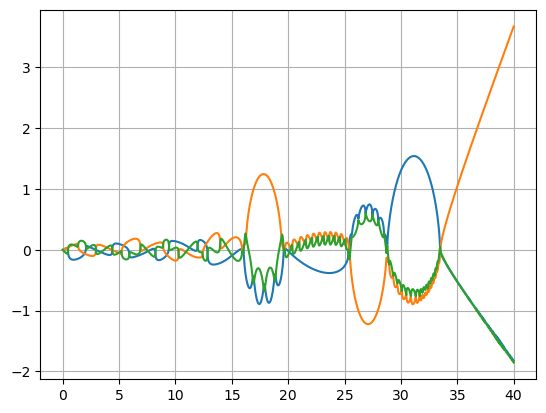

In [33]:
plt.plot(t, y1)
plt.plot(t, y2)
plt.plot(t, y3)
plt.grid()

# Adaptive Step Size Runge-Kutta Method

Sometimes the ODE that we are trying to solve may have a more complex form that could involve both narrow peaks and broader structures. But using one of the methods shown above can either mask out the narrow peaks if the step size is too large or spend too much computation time on the broader features. So what we can use is the adaptive step size Runge-Kutta Method. By choosing an initial step size, we can make it smaller if needed based on an error that we choose. If the differential equation varies by more than that error than it reduces the step size until it fits.

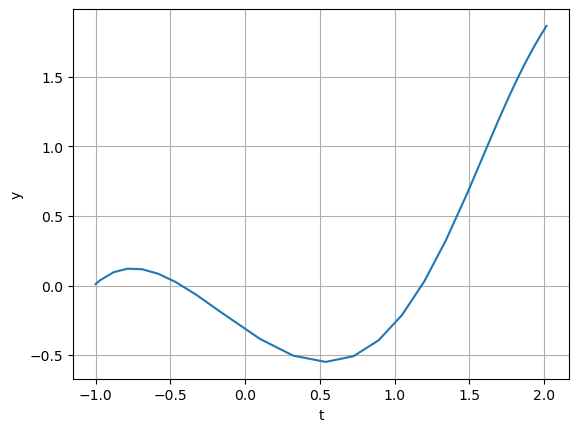

In [34]:
import numpy as np

def rk4_step(f, t, y, h):
    """Perform a single RK4 step."""
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def adaptive_rk4(f, t_span, y0, tol=1e-6):
    """Solve ODE with adaptive step size RK4."""
    t0, tf = t_span
    t, y = t0, y0
    h = (tf - t0) / 100  # Initial step size

    t_values = [t]
    y_values = [y]

    while t < tf:
        y1 = rk4_step(f, t, y, h)  # Full step
        y2 = rk4_step(f, t, y, 0.5 * h)  # Two half steps
        y2 = rk4_step(f, t + 0.5 * h, y2, 0.5 * h)

        error = np.linalg.norm(y1 - y2) / 15  # Error estimate

        if error < tol:
            t += h
            y = y1
            t_values.append(t)
            y_values.append(y)

        h *= 0.6 * (tol / error) ** 0.2  # Adjust step size

    return np.array(t_values), np.array(y_values)

if __name__ == "__main__":
    def f(t, y):
        return -np.exp(y) + 2*t**2

    t_span = (-1, 2)
    y0 = 0.01

    t, y = adaptive_rk4(f, t_span, y0)

    import matplotlib.pyplot as plt
    plt.plot(t, y)
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('y')
    plt.show()